In [1]:
from matplotlib import pyplot as plt
import pytesseract
import cv2
import numpy as np
import pandas as pd
import os
import shutil

# psm 6 = Assume a single uniform block of text.
config_tesseract = '--tessdata-dir ./ttesseract_langs --psm 6'


In [2]:
def read_input_file_list():
    
    input_data = pd.read_csv(r'./labelled_images_sipa5.txt', names=["file_name","seen_value","ncol2","ncol3"], sep="\t", header=None)
    input_data = input_data.reset_index()

    print(len(input_data), "input images")
    return input_data

In [3]:
def draw_text_box(img_file):
    # Read the image file
    img = cv2.imread(img_file)

    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply thresholding to the image
    _, thresh = cv2.threshold(gray, 90, 255, cv2.THRESH_BINARY)

    # Find contours in the image
    contours, _ = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

    # Draw the convex hull of the innermost contour on the image
    # for contour in contours:
        # hull = cv2.convexHull(contour)
        # cv2.drawContours(img,[hull],0,(0,255,0),2)

    # for contour in contours:
    #     epsilon = 0.1*cv2.arcLength(contour,True)
    #     approx = cv2.approxPolyDP(contour,epsilon,True)
    #     cv2.drawContours(img,[approx],0,(0,255,0),2)
    
    for contour in contours:
        (x, y, w, h) = cv2.boundingRect(contour)
        if w < 100 or h < 100:
            continue
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
        # roi = img[y:y+h, x:x+w]
    
    text_window = img[y:y+h, x:x+w]
    cv2.imwrite("text_window.jpg", text_window)

        # Isolate the inner text window
    # contours.sort(key=cv2.contourArea)
    # for contour in contours[:2]:
    #     (x, y, w, h) = cv2.boundingRect(contour)
    #     text_window = img[y:y+h, x:x+w]
    
    # # Save the inner text window as an image file
    # cv2.imwrite("text_window.jpg", text_window)

    # for contour in contours:
    #     rect = cv2.minAreaRect(contour)
    #     box = cv2.boxPoints(rect)
    #     box = np.int0(box)
    #     cv2.drawContours(img,[box],0,(0,255,0),2)
    
    text_ssd = pytesseract.image_to_string(text_window, lang="ssd", config=config_tesseract)
    text_eng = pytesseract.image_to_string(text_window, lang="eng", config=config_tesseract)
    print(text_ssd)
    print("AD")
    print(text_eng)


    show_img(text_window)
    # Show the image with the innermost contour
    # cv2.imshow("Innermost Contour", img)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()


In [4]:
#########################################################################################################
# Function to show an image using pyplot
def show_img(img, size=12):
    fig = plt.gcf()
    fig.set_size_inches(size, size)
    plt.axis("off")
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

1 4924°4.
4 800
1 0.5388
1 1 7 1 1
9 10
165 1 1.4 1 7
:
101 1 8
7 0 4848 0.6 1 331
91 6 3
8.1 4 38323
0021200000000000 4 85
514711994 1100133

114/8101°001°07%/07 4 1.44

AD
‘ ‘
l RS
} e ——
[ . ! A =Y
| N
e ] A \ E
; : | ‘ Ir :
& | / =
:E(gi,i: B e A e 1 / =
e : =
B / e
Lo o TG SR ’ =
NI K S E R ON /OFF

NIrNIrov/nNn /. £



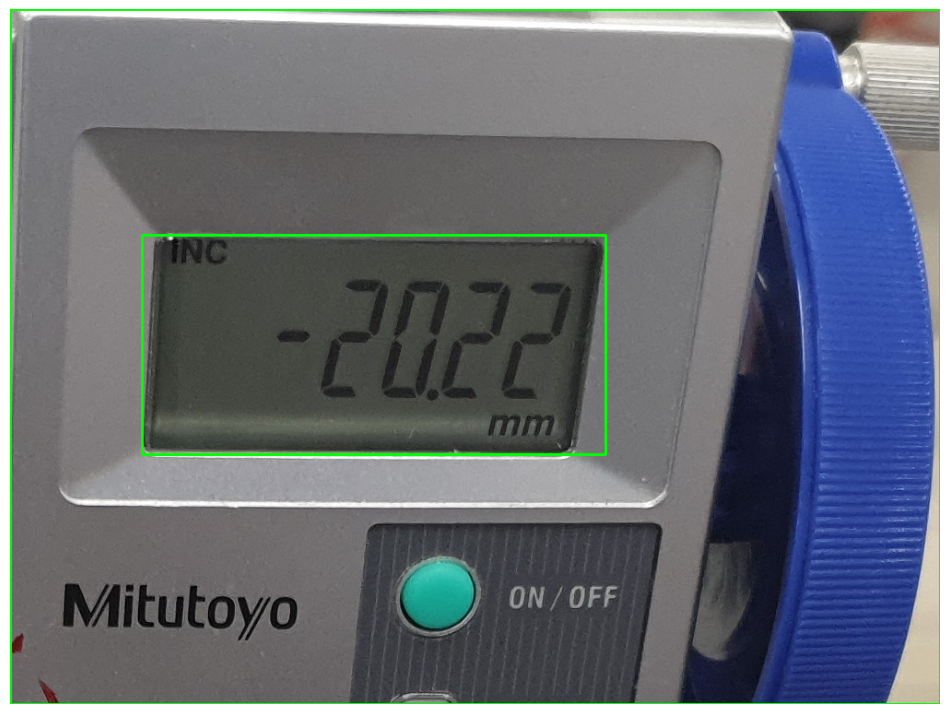

In [5]:
image = "./sipaimages/5/20.jpg"
draw_text_box(image)

In [13]:
from skimage import io
from skimage.measure import find_contours
import matplotlib.pyplot as plt
import skimage

def draw_text_box(img_file):
    # Read the image file
    img = io.imread(img_file)

    # Convert the image to grayscale
    gray = skimage.color.rgb2gray(img)
    # gray = io.color.rgb2gray(img)

    # Apply thresholding to the image
    thresh = gray > 0.5

    # Find contours in the image
    contours = find_contours(thresh, 0.5)

    # Draw a line around the text
    fig, ax = plt.subplots()
    ax.imshow(img, cmap=plt.cm.gray)
    for contour in contours:
        ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

    plt.show()


1 60 1

AD
J Lﬁf x



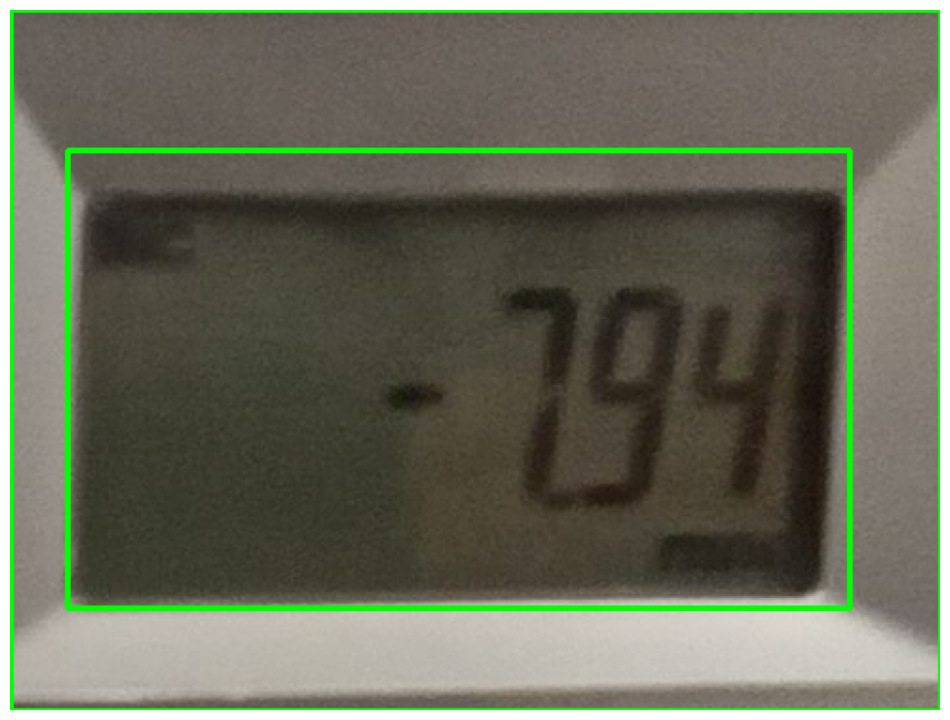

In [6]:
image = "./sipaimages/5/1.jpg"
draw_text_box(image)


AD



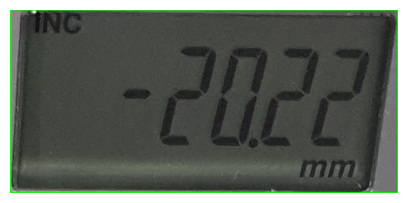

In [7]:
# Read the image file
img = cv2.imread(image)

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply thresholding to the image
_, thresh = cv2.threshold(gray, 90, 255, cv2.THRESH_BINARY)

# Find contours in the image
contours, _ = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
t_count = 0
for contour in contours:
    (x, y, w, h) = cv2.boundingRect(contour)
    if w < 100 or h < 100:
        continue
    t_count += 1
    if t_count == 1:
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
        text_window = img[y:y+h, x:x+w]

    # print("AD")
        # roi = img[y:y+h, x:x+w]
    
text_ssd = pytesseract.image_to_string(text_window, lang="ssd", config=config_tesseract)
text_eng = pytesseract.image_to_string(text_window, lang="eng", config=config_tesseract)
print(text_ssd)
print("AD")
print(text_eng)

show_img(text_window, 5)

In [7]:
def crop_image(image):
    # Read the image file
    img = cv2.imread(image)

    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply thresholding to the image
    _, thresh = cv2.threshold(gray, 90, 255, cv2.THRESH_BINARY)

    # Find contours in the image
    contours, _ = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    t_count = 0
    text_window = None
    for contour in contours:
        (x, y, w, h) = cv2.boundingRect(contour)
        if w < 100 or h < 100:
            continue
        t_count += 1
        
        if t_count == 1:
            # cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
            text_window = img[y:y+h, x:x+w]

    return text_window

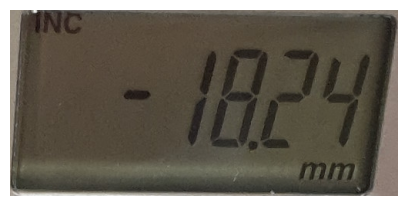

In [8]:
image = "./sipaimages/5/19.jpg"
cropped_image = crop_image(image)

show_img(cropped_image, 5)


In [9]:
input_data = read_input_file_list()
for row in input_data.iterrows():
    input_file = row[1][1]
    print(input_file)
    cropped_image = crop_image(input_file)
    if cropped_image is not None:
        # show_img(cropped_image, 5)
        folder_split = input_file.split("\\")
        sub_folder = "cropped\\sipa\\" + folder_split[2]
        file_name = "cropped_" + folder_split[3]

        cv2.imwrite(file_name, cropped_image)


        # print(sub_folder)
        # print(folder_split)
        if not os.path.exists(sub_folder):
            os.makedirs(sub_folder)

        shutil.copy2(file_name, sub_folder)


26 input images
.\sipaimages\5\10.jpg
.\sipaimages\5\11.jpg
.\sipaimages\5\12.jpg
.\sipaimages\5\13.jpg
.\sipaimages\5\14.jpg
.\sipaimages\5\15.jpg
.\sipaimages\5\16.jpg
.\sipaimages\5\17.jpg
.\sipaimages\5\18.jpg
.\sipaimages\5\19.jpg
.\sipaimages\5\2.jpg
.\sipaimages\5\20.jpg
.\sipaimages\5\21.jpg
.\sipaimages\5\22.jpg
.\sipaimages\5\23.jpg
.\sipaimages\5\24.jpg
.\sipaimages\5\25.jpg
.\sipaimages\5\26.jpg
.\sipaimages\5\27.jpg
.\sipaimages\5\3.jpg
.\sipaimages\5\4.jpg
.\sipaimages\5\5.jpg
.\sipaimages\5\6.jpg
.\sipaimages\5\7.jpg
.\sipaimages\5\8.jpg
.\sipaimages\5\9.jpg


In [40]:
folder_split = input_file.split("\\")
sub_folder = "cropped\\sipa\\" + folder_split[2]

print(sub_folder)
print(folder_split)
if not os.path.exists(sub_folder):
        os.makedirs(sub_folder)

shutil.copy2(input_file, sub_folder)

cropped\sipa\5
['.', 'sipaimages', '5', '10.jpg']


'cropped\\sipa\\5\\10.jpg'

In [31]:
def read_resize_data(input_file):
    img = cv2.imread(input_file)
    # width = 300
    # height = 300
    width = 180
    height = 180
    dim = (width, height)

    # resize image
    resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)

    return resized


In [48]:
def read_resize_data_b(input_file):
    # img = cv2.imread(input_file)
    # width = 300
    # height = 300
    width = 100
    height = 100
    dim = (width, height)

    # resize image
    resized = cv2.resize(input_file, dim, interpolation = cv2.INTER_AREA)

    return resized


In [8]:
def get_text(image):

    # Read text from image using Seven Segment training data
    text_ssd = pytesseract.image_to_string(image, lang="ssd", config=config_tesseract)

    # Read text from image using English character training data
    text_eng = pytesseract.image_to_string(image, lang="eng", config=config_tesseract)
    
    # Clean text
    text_ssd = ''.join(c for c in text_ssd if c.isdigit() or c == '.')
    text_eng = ''.join(c for c in text_eng if c.isdigit() or c == '.')

    return text_ssd, text_eng

In [9]:
def process_7segment(input_file):

    # Get image data
    # img = read_input_data(input_file)
    img = read_resize_data(input_file)

    # Convert to RGB (three dimensions)
    nimRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Convert to gray (one dimension)
    nimGray = cv2.cvtColor(nimRGB, cv2.COLOR_BGR2GRAY)

    # Coordinates on the x and y axis
    scale_size = 0.1

    # Block size pf a pixel neighbourhood that is used to calculate a threshold value for the pixel
    pixel_block_size = 11

    # Constant subtracted from the mean or weighted mean. (Normally it is positive but can be 0 or negative) - default here is 9
    constant_to_subtract = 9

    # Adaptive Average
    adaptive_average = cv2.adaptiveThreshold(nimGray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, pixel_block_size, constant_to_subtract)
    
    # Invert Adaptive Average
    invert = 255 - adaptive_average

    # Dilation
    open_invert = cv2.dilate(invert, np.ones((3,3), np.uint8))

    # Decrease size to 0.1
    decrease = cv2.resize(open_invert, None, fx = scale_size, fy = scale_size, interpolation = cv2.INTER_AREA)

    text_ssd, text_eng = get_text(decrease)
    return text_ssd, text_eng

In [46]:
def process_7segment_b(input_file):

    # Get image data
    # img = read_input_data(input_file)
    img = read_resize_data_b(input_file)

    # Convert to RGB (three dimensions)
    nimRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Convert to gray (one dimension)
    nimGray = cv2.cvtColor(nimRGB, cv2.COLOR_BGR2GRAY)

    # Coordinates on the x and y axis
    scale_size = 0.1

    # Block size pf a pixel neighbourhood that is used to calculate a threshold value for the pixel
    pixel_block_size = 11

    # Constant subtracted from the mean or weighted mean. (Normally it is positive but can be 0 or negative) - default here is 9
    constant_to_subtract = 9

    # Adaptive Average
    adaptive_average = cv2.adaptiveThreshold(nimGray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, pixel_block_size, constant_to_subtract)
    
    # Invert Adaptive Average
    invert = 255 - adaptive_average

    # Dilation
    open_invert = cv2.dilate(invert, np.ones((3,3), np.uint8))

    # Decrease size to 0.1
    decrease = cv2.resize(open_invert, None, fx = scale_size, fy = scale_size, interpolation = cv2.INTER_AREA)

    # text_ssd, text_eng = get_text(decrease)
    text_ssd, text_eng = get_text(open_invert)
    return text_ssd, text_eng

In [49]:
input_data = read_input_file_list()
for row in input_data.iterrows():
    input_file = row[1][1]
    print(input_file)
    cropped_image = crop_image(input_file)
    if cropped_image is not None:
        text_ssd, text_eng = process_7segment_b(cropped_image)
        print(text_ssd)
        print(text_eng)


26 input images
.\sipaimages\5\10.jpg


.\sipaimages\5\11.jpg


.\sipaimages\5\12.jpg


.\sipaimages\5\13.jpg


.\sipaimages\5\14.jpg


.\sipaimages\5\15.jpg


.\sipaimages\5\16.jpg


.\sipaimages\5\17.jpg
112
7
.\sipaimages\5\18.jpg


.\sipaimages\5\19.jpg


.\sipaimages\5\2.jpg


.\sipaimages\5\20.jpg


.\sipaimages\5\21.jpg


.\sipaimages\5\22.jpg


.\sipaimages\5\23.jpg
1

.\sipaimages\5\24.jpg
126

.\sipaimages\5\25.jpg


.\sipaimages\5\26.jpg
118

.\sipaimages\5\27.jpg


.\sipaimages\5\3.jpg
11

.\sipaimages\5\4.jpg


.\sipaimages\5\5.jpg
1011
6
.\sipaimages\5\6.jpg
81

.\sipaimages\5\7.jpg


.\sipaimages\5\8.jpg
11

.\sipaimages\5\9.jpg


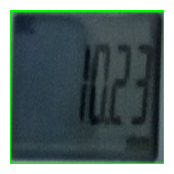

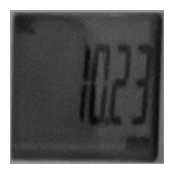

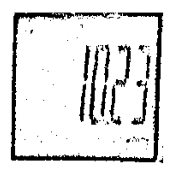

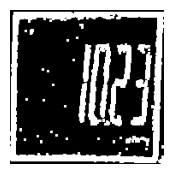

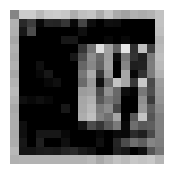

In [40]:

input_file = "./cropped/sipa/5/cropped_17.jpg"

# Get image data
# img = read_input_data(input_file)
img = read_resize_data(input_file)

# Convert to RGB (three dimensions)
nimRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

show_img(nimRGB, 2)

# Convert to gray (one dimension)
nimGray = cv2.cvtColor(nimRGB, cv2.COLOR_BGR2GRAY)
show_img(nimGray, 2)

# Coordinates on the x and y axis
scale_size = 0.1

# Block size pf a pixel neighbourhood that is used to calculate a threshold value for the pixel
pixel_block_size = 11

# Constant subtracted from the mean or weighted mean. (Normally it is positive but can be 0 or negative) - default here is 9
constant_to_subtract = 9

# Adaptive Average
adaptive_average = cv2.adaptiveThreshold(nimGray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, pixel_block_size, constant_to_subtract)
show_img(adaptive_average, 2)
# Invert Adaptive Average
invert = 255 - adaptive_average

# Dilation
open_invert = cv2.dilate(invert, np.ones((3,3), np.uint8))
show_img(open_invert, 2)
# Decrease size to 0.1
decrease = cv2.resize(open_invert, None, fx = scale_size, fy = scale_size, interpolation = cv2.INTER_AREA)
show_img(decrease, 2)
text_ssd, text_eng = get_text(decrease)
